In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'aprsdata.csv')

In [8]:
df.loc[df['unit2'] == '-SAG-11-ios','unit2'] = 'SAG-11'

In [10]:
len(df)

978

In [11]:
df.columns

Index(['time', 'lasttime', 'lat', 'lng', 'speed', 'course', 'altitude',
       'comment', 'Unit', 'hour', 'c', 'unit2'],
      dtype='object')

In [12]:
kmax = pd.read_clipboard()

In [14]:
kmax.columns

Index(['h', 'altitude', 'c', 'comment', 'course', 'hour', 'lasttime', 'lat',
       'lng', 'speed', 'time', 'unit2'],
      dtype='object')

In [15]:
kmax['Unit'] = kmax['unit2']

In [17]:
kmax[['time','lasttime','lat','lng','speed','course','altitude','comment','Unit','hour','c','unit2']]

66

In [20]:
df['time'] = pd.to_datetime(df['time'])
kmax['time'] = pd.to_datetime(kmax['time'])

In [22]:
df = df.append(kmax[['time','lasttime','lat','lng','speed','course','altitude','comment','Unit','hour','c','unit2']], ignore_index=True)

In [23]:
len(df)

1044

In [24]:
978+66

1044

In [26]:
df = df.sort_values(by='time')

In [28]:
df.reset_index(inplace=True, drop=True)

In [31]:
df['c'].unique()

array(['w', 'c', 'r', 'y', 'b', 'm', 'k', 'g', nan], dtype=object)

In [33]:
df[df['c'].isnull()].unit2.unique()

array(['SAG-06'], dtype=object)

In [36]:
for i,j in zip(sorted(df.unit2.unique()),{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:gray', 'tab:olive', 'tab:cyan'}):
    df.loc[df['unit2'] == i,'c'] = j

In [42]:
df[df['lat'] < 38]

,time,lasttime,lat,lng,speed,course,altitude,comment,Unit,hour,c,unit2


In [41]:
df.drop(labels=732, inplace=True)

In [106]:
df.to_csv(r'aprsdata.csv', index=False)

In [58]:
df = df.loc[21:]

In [104]:
df.loc[df['unit2'] == 'SAG-06','time'] = df.loc[df['unit2'] == 'SAG-06','time'] - pd.Timedelta(4, unit='h')

C:\Users\collins\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [107]:
# df.loc[df['unit2'] == 'SAG-06','time']

In [108]:
df.reset_index(inplace=True, drop=True)

In [109]:
dt = df[['time']]

In [110]:
dt.drop_duplicates(inplace=True)

C:\Users\collins\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
dt.reset_index(inplace=True, drop=True)

In [112]:
df.unit2.unique()

array(['SAG-09', 'SAG-11', 'SAG-01', 'SAG-04', 'BIK-01', 'SAG-02',
       'SAG-13', 'SAG-08', 'SAG-06'], dtype=object)

In [113]:
sag9 = dt.merge(df[df['unit2'] == 'SAG-09'], how='outer').ffill().dropna(subset=['unit2'])
sag11 = dt.merge(df[df['unit2'] == 'SAG-11'], how='outer').ffill().dropna(subset=['unit2'])
sag1 = dt.merge(df[df['unit2'] == 'SAG-01'], how='outer').ffill().dropna(subset=['unit2'])
sag4 = dt.merge(df[df['unit2'] == 'SAG-04'], how='outer').ffill().dropna(subset=['unit2'])
bik1 = dt.merge(df[df['unit2'] == 'BIK-01'], how='outer').ffill().dropna(subset=['unit2'])
sag2 = dt.merge(df[df['unit2'] == 'SAG-02'], how='outer').ffill().dropna(subset=['unit2'])
sag13 = dt.merge(df[df['unit2'] == 'SAG-13'], how='outer').ffill().dropna(subset=['unit2'])
sag8 = dt.merge(df[df['unit2'] == 'SAG-08'], how='outer').ffill().dropna(subset=['unit2'])
sag6 = dt.merge(df[df['unit2'] == 'SAG-06'], how='outer').ffill().dropna(subset=['unit2'])

In [118]:
sag6.head()

,time,lasttime,lat,lng,speed,course,altitude,comment,Unit,hour,c,unit2
176,2018-08-26 08:49:00,2018-08-26 12:49,39.0635,-77.46933,54.0,33.0,92.0,KD4MAX-6,SAG-06,NaN,tab:blue,SAG-06
177,2018-08-26 08:50:00,2018-08-26 12:49,39.0635,-77.46933,54.0,33.0,92.0,KD4MAX-6,SAG-06,NaN,tab:blue,SAG-06
178,2018-08-26 08:51:00,2018-08-26 12:49,39.0635,-77.46933,54.0,33.0,92.0,KD4MAX-6,SAG-06,NaN,tab:blue,SAG-06
179,2018-08-26 08:52:00,2018-08-26 12:49,39.0635,-77.46933,54.0,33.0,92.0,KD4MAX-6,SAG-06,NaN,tab:blue,SAG-06
180,2018-08-26 08:53:00,2018-08-26 12:49,39.0635,-77.46933,54.0,33.0,92.0,KD4MAX-6,SAG-06,NaN,tab:blue,SAG-06


In [114]:
df2 = pd.concat([sag9, sag11, sag1, sag4, bik1, sag2, sag13, sag8, sag6], ignore_index=True)

In [115]:
df2 = df2.sort_values(by='time')

In [116]:
df2.reset_index(inplace=True, drop=True)

In [117]:
df2.set_index(keys=['time','unit2'])

lasttime       lat       lng  speed  \
time                unit2                                                    
2018-08-26 05:26:00 SAG-09  2018-08-26 05:29:00  38.97050 -77.38633    0.0   
2018-08-26 05:37:00 SAG-09  2018-08-26 05:37:00  38.97067 -77.38667   11.0   
2018-08-26 05:38:00 SAG-09  2018-08-26 05:38:00  38.96933 -77.38933   39.0   
2018-08-26 05:42:00 SAG-09  2018-08-26 05:42:00  38.97933 -77.42667   52.0   
2018-08-26 05:46:00 SAG-09  2018-08-26 05:46:00  39.02783 -77.43100   65.0   
2018-08-26 05:48:00 SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 05:53:00 SAG-11  2018-08-26 05:53:00  38.91681 -77.50344   22.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 05:54:00 SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
                    SAG-11  2018-08-26 05:54:00  38.91477 -77.50565   39.0   
2018-08-26 05:55:00 SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
                    SAG-11  2018-08-26 05:55:00  38.91106 -77.49304   74.0   
2018-08-26 05:56:00 SAG-11  2018-08-26 05:56:00  38.91581 -77.48502   64.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 05:57:00 SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
                    SAG-11  2018-08-26 05:57:00  38.91019 -77.47113   84.0   
2018-08-26 05:58:00 SAG-11  2018-08-26 05:58:00  38.90441 -77.45680   82.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 05:59:00 SAG-11  2018-08-26 05:59:00  38.89877 -77.44290   85.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 06:00:00 SAG-11  2018-08-26 06:00:00  38.89962 -77.43754   86.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 06:01:00 SAG-11  2018-08-26 06:01:00  38.91379 -77.43040  108.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 06:02:00 SAG-11  2018-08-26 06:02:00  38.92995 -77.42984  111.0   
                    SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
2018-08-26 06:03:00 SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
                    SAG-11  2018-08-26 06:03:00  38.94675 -77.42949  105.0   
2018-08-26 06:04:00 SAG-09  2018-08-26 05:56:00  39.03000 -77.43350    0.0   
                    SAG-11  2018-08-26 06:04:00  38.96023 -77.42582   84.0   
...                                         ...       ...       ...    ...   
2018-08-26 16:46:00 SAG-06     2018-08-26 16:24  39.11350 -77.56217    7.0   
                    SAG-08  2018-08-26 14:26:00  39.18677 -77.60907    0.0   
                    SAG-13  2018-08-26 16:03:00  38.95736 -77.35696    0.0   
2018-08-26 17:16:00 SAG-04  2018-08-26 15:10:00  38.96333 -77.35917    0.0   
                    SAG-08  2018-08-26 14:26:00  39.18677 -77.60907    0.0   
                    SAG-11  2018-08-26 15:33:00  39.14346 -77.65000    1.0   
                    SAG-02  2018-08-26 15:37:00  39.16700 -77.64967   83.0   
                    BIK-01  2018-08-26 11:01:00  38.95750 -77.35867    4.0   
                    SAG-06     2018-08-26 16:24  39.11350 -77.56217    7.0   
                    SAG-09  2018-08-26 16:28:00  38.96050 -77.36283   30.0   
                    SAG-13  2018-08-26 16:03:00  38.95736 -77.35696    0.0   
                    SAG-01  2018-08-26 17:16:00  38.97094 -77.35668    4.0   
2018-08-26 17:24:00 SAG-11  2018-08-26 15:33:00  39.14346 -77.65000    1.0   
                    SAG-06     2018-08-26 16:24  39.11350 -77.56217    7.0   
                    SAG-02  2018-08-26 15:37:00  39.16700 -77.64967   83.0   
                    SAG-08  2018-08-26 14:26:00  39.18677 -77.60907    0.0   
                    SAG-13  2018-08-26 16:03:00  38.95736 -77.35696    0.0   
                    SAG-01  2018-08-26 17:24:00  38.97212 -77.35787    2.0   
                    SAG-09  2018-08-26 16:28:00  38.96050 -77

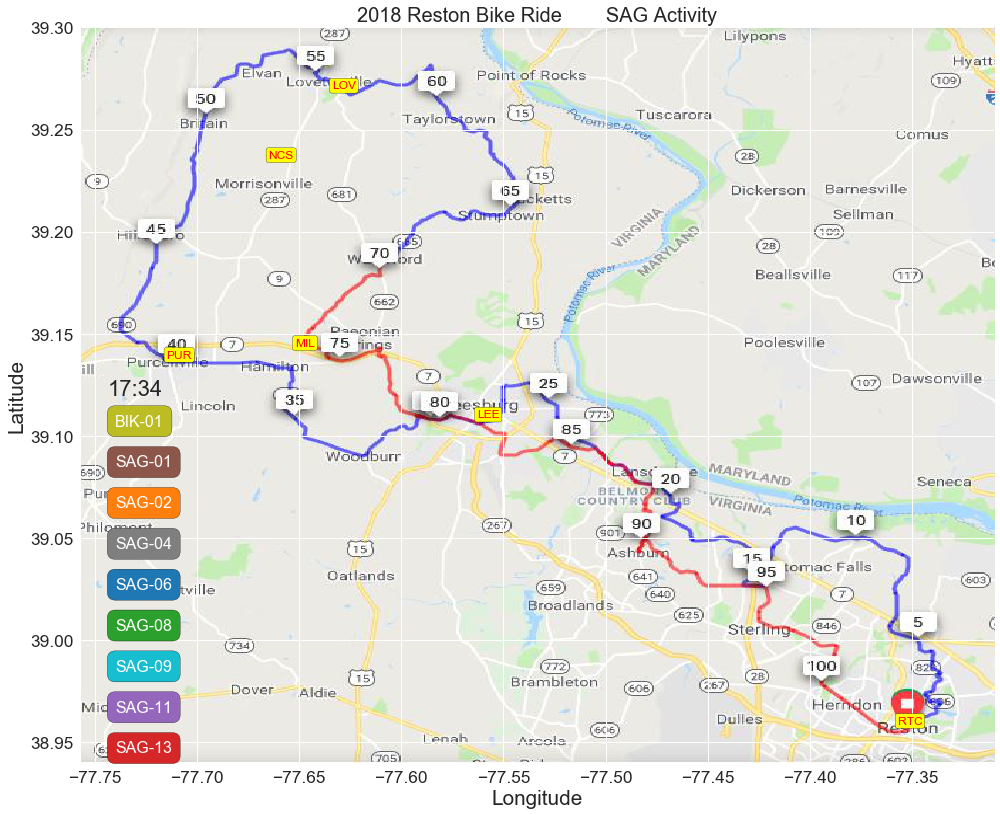

In [119]:
plt.close('all')
# anim_data = pd.read_csv(r'.\animationdata.csv')

import numpy as np
from scipy.misc import imread
import seaborn as sns
from matplotlib import gridspec
from matplotlib import animation

img_rbc = imread(r".\rbc.jpg")   

params = {'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.labelsize':'xx-large',
         'figure.titlesize':'xx-large'}
plt.rcParams.update(params)


fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(1, 2, width_ratios=[100, 0]) 
ax1 = fig.add_subplot(gs[0])
ax1.set_xlim(-77.757,-77.31)
ax1.set_ylim(38.94,39.3)
ax1.imshow(img_rbc, extent=[-77.757,-77.31, 38.94, 39.3])#, alpha=0.5)
# # Fixed Stations
names = ['PUR','LEE','LOV','MIL','NCS','RTC']
lats = [-77.714943,-77.563,-77.634,-77.652,-77.665,-77.357]
lons = [39.138259,39.109,39.27,39.144,39.236,38.959]

for i,j,s in zip(names,lats,lons):
    ax1.annotate(i, xy=(j, s), color='red', fontsize=12,
                 bbox=dict(boxstyle='round,pad=0.2', fc='yellow'))

legx, legy = -77.74,39.105
for key,value in sorted(df2.groupby(by='unit2')['c'].max().to_dict().items()):
    color = 'w'
    if value == 'w':
        color = 'k'
    ax1.annotate(key, xy=(legx,legy), color=color, fontsize=16,
                bbox=dict(boxstyle='round,pad=0.5', fc=value))
    legy -= .02
ax1.set_title('2018 Reston Bike Ride        SAG Activity', fontsize=20)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
scat = ax1.scatter([], [], s=500, edgecolors='k')#, alpha=0.4)
date_text = ax1.text(0.03, 0.50, '', transform=ax1.transAxes, fontsize=22)

def init():
    scat.set_offsets([])
    return scat

def animate(i):
    timestamp = df2.time.unique()[i]
    x = df2.loc[df2['time'] == timestamp, 'lng'].values
    y = df2.loc[df2['time'] == timestamp, 'lat'].values
    c = df2.loc[df2['time'] == timestamp, 'c']
    data = np.hstack((x[:,np.newaxis], y[:, np.newaxis]))
    scat.set_offsets(data)
    scat.set_color(c)
    date_text.set_text(pd.to_datetime(timestamp).strftime("%H:%M"))
    return scat

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(df2.time.unique()), interval=100, repeat=True)
anim.save('SAGprs.mp4', extra_args=['-vcodec', 'libx264'])
plt.show()

In [99]:
df2.loc[df2['unit2'] == 'SAG-06','time'].unique()

array(['2018-08-26T12:49:00.000000000', '2018-08-26T12:50:00.000000000',
       '2018-08-26T12:51:00.000000000', '2018-08-26T12:52:00.000000000',
       '2018-08-26T12:53:00.000000000', '2018-08-26T12:54:00.000000000',
       '2018-08-26T12:55:00.000000000', '2018-08-26T12:56:00.000000000',
       '2018-08-26T12:57:00.000000000', '2018-08-26T12:58:00.000000000',
       '2018-08-26T12:59:00.000000000', '2018-08-26T13:00:00.000000000',
       '2018-08-26T13:01:00.000000000', '2018-08-26T13:02:00.000000000',
       '2018-08-26T13:03:00.000000000', '2018-08-26T13:04:00.000000000',
       '2018-08-26T13:05:00.000000000', '2018-08-26T13:06:00.000000000',
       '2018-08-26T13:07:00.000000000', '2018-08-26T13:08:00.000000000',
       '2018-08-26T13:10:00.000000000', '2018-08-26T13:11:00.000000000',
       '2018-08-26T13:12:00.000000000', '2018-08-26T13:13:00.000000000',
       '2018-08-26T13:15:00.000000000', '2018-08-26T13:16:00.000000000',
       '2018-08-26T13:17:00.000000000', '2018-08-26

In [122]:
df2.to_csv(r'animationdata.csv', index=False)

In [125]:
df.to_clipboard()

In [126]:
len(df)

1022